# IMPORTING NECESSARY LIBRARIES

In [3]:
!pip install libopencv

In [4]:
import cv2
import libopencv

In [5]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from __future__ import print_function
import numpy as np
from tensorflow import keras
from keras import layers
from keras.models import Sequential, Model
from keras.layers import GlobalMaxPooling2D , MaxPool2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,AveragePooling2D,concatenate

In [6]:
dataset_path = os.listdir()
dataset_path

['.config',
 'Laminar_turbulent_classifier (2).zip',
 'Laminar_turbulent_classifier',
 'sample_data']

In [7]:
image_type = os.listdir('Laminar_turbulent_classifier/data')
image_type

['turbulent', 'laminar']

In [8]:
images = []
for item in image_type:
    image_path = os.listdir('Laminar_turbulent_classifier/data'+'/'+item)
    for img in image_path:
        images.append((item,str('Laminar_turbulent_classifier/data'+'/'+item)+'/'+img))
print(len(images))
print(len(images[0]))

291
2


In [9]:
image_df = pd.DataFrame(data=images,columns=['image_type','image'])
image_df.head()

,image_type,image
0,turbulent,Laminar_turbulent_classifier/data/turbulent/tu...
1,turbulent,Laminar_turbulent_classifier/data/turbulent/tu...
2,turbulent,Laminar_turbulent_classifier/data/turbulent/tu...
3,turbulent,Laminar_turbulent_classifier/data/turbulent/tu...
4,turbulent,Laminar_turbulent_classifier/data/turbulent/tu...


In [10]:
image_df.value_counts('image_type')

image_type
turbulent    154
laminar      137
dtype: int64

In [11]:
img = []
label = []
for item in images:
    pic = cv2.imread(item[1])
    pic = cv2.resize(pic,(512,256))
    img.append(pic)
    label.append(item[0])
img = np.array(img)
img.shape

(291, 256, 512, 3)

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
y = image_df['image_type'].values
y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform(y)
y = y.reshape(-1,1)
# y_hot = OneHotEncoder()
# y = y_hot.fit_transform(y)
print(y.shape)

(291, 1)


In [13]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

img , y = shuffle(img,y,random_state=42)
X_train_val,X_test,Y_train_val,Y_test = train_test_split(img,y,test_size=0.1,random_state=42)
X_train,X_val,Y_train,Y_val = train_test_split(X_train_val,Y_train_val,test_size=0.1,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(X_val.shape)
print(Y_val.shape)

(234, 256, 512, 3)
(30, 256, 512, 3)
(234, 1)
(30, 1)
(27, 256, 512, 3)
(27, 1)


1 is assigned to turbulent and 0 is to laminar

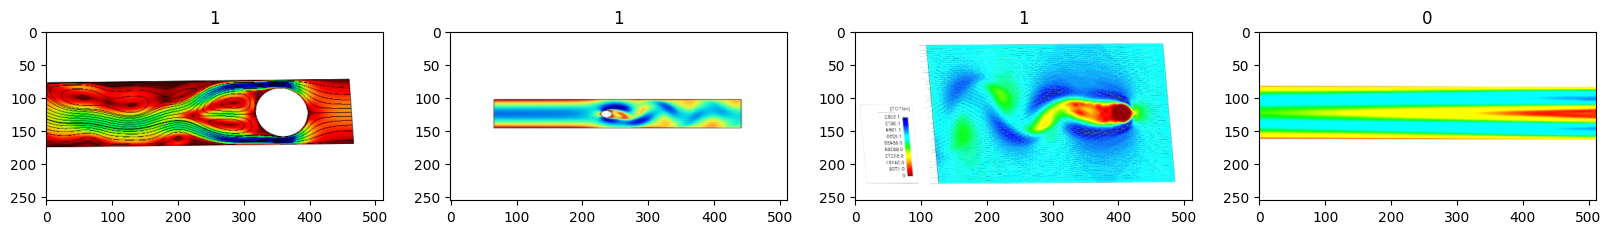

In [14]:
img, ax=plt.subplots(ncols=4, figsize=(20,20))
for i in range(0,4):
    ax[i].imshow(X_train[i])
    ax[i].title.set_text(Y_train[i][0])
# print(Y_train)

In [15]:
logdir='log'

In [16]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

# AlexNet

In [17]:
AlexNet = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(256,512,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
AlexNet.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [19]:
AlexNet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 62, 126, 96)       34944     
                                                                 
 batch_normalization_5 (Batc  (None, 62, 126, 96)      384       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 62, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 62, 256)       614656    
                                                                 
 batch_normalization_6 (Batc  (None, 30, 62, 256)      1024      
 hNormalization)                                                 
                                                      

In [20]:
histA = AlexNet.fit(X_train,Y_train,epochs=20,validation_data=(X_val,Y_val))

Epoch 1/20
8/8 [==============================] - 77s 9s/step - loss: 76.2254 - accuracy: 0.5556 - val_loss: 151122.7500 - val_accuracy: 0.4444
Epoch 2/20
8/8 [==============================] - 68s 8s/step - loss: 15.3843 - accuracy: 0.5256 - val_loss: 47936.9648 - val_accuracy: 0.4444
Epoch 3/20
8/8 [==============================] - 68s 8s/step - loss: 7.0303 - accuracy: 0.6538 - val_loss: 24320.3652 - val_accuracy: 0.4444
Epoch 4/20
8/8 [==============================] - 67s 8s/step - loss: 3.5438 - accuracy: 0.6966 - val_loss: 7053.2627 - val_accuracy: 0.4444
Epoch 5/20
8/8 [==============================] - 66s 8s/step - loss: 1.9956 - accuracy: 0.7265 - val_loss: 4569.0161 - val_accuracy: 0.4444
Epoch 6/20
8/8 [==============================] - 65s 8s/step - loss: 2.6482 - accuracy: 0.7179 - val_loss: 3694.9287 - val_accuracy: 0.4444
Epoch 7/20
8/8 [==============================] - 66s 8s/step - loss: 0.7291 - accuracy: 0.8632 - val_loss: 2894.1816 - val_accuracy: 0.4444
Epoch 8

# PLOTTING LOSS FUNCTION AND VALIDATION LOSS VS EPOCHS

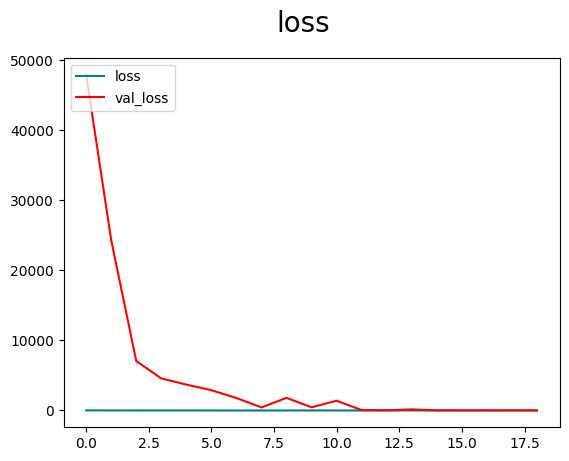

In [21]:
fig=plt.figure()
plt.plot(histA.history['loss'][1:],color='teal',label='loss',)
plt.plot(histA.history['val_loss'][1:],color='red',label='val_loss')
fig.suptitle('loss',fontsize='20')
plt.legend(loc='upper left')
plt.show()

# PLOTTING ACCURACY

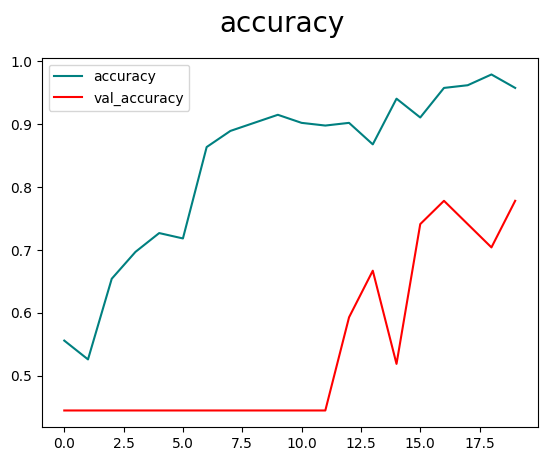

In [22]:
fig=plt.figure()
plt.plot(histA.history['accuracy'],color='teal',label='accuracy')
plt.plot(histA.history['val_accuracy'],color='red',label='val_accuracy')
fig.suptitle('accuracy',fontsize='20')
plt.legend(loc='upper left')
plt.show()

In [23]:
preds = AlexNet.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1/1 [==============================] - 2s 2s/step - loss: 18.7422 - accuracy: 0.7333
Loss = 18.742168426513672
Test Accuracy = 0.7333333492279053


# Lenet-5

In [24]:
Lenet = keras.Sequential()
Lenet.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(256,512,3)))
Lenet.add(layers.AveragePooling2D())

Lenet.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
Lenet.add(layers.AveragePooling2D())

Lenet.add(layers.Flatten())

Lenet.add(layers.Dense(units=120, activation='relu'))

Lenet.add(layers.Dense(units=84, activation='relu'))

Lenet.add(layers.Dense(units=1, activation = 'sigmoid'))

In [25]:
Lenet.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])
Lenet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 254, 510, 6)       168       
                                                                 
 average_pooling2d (AverageP  (None, 127, 255, 6)      0         
 ooling2D)                                                       
                                                                 
 conv2d_11 (Conv2D)          (None, 125, 253, 16)      880       
                                                                 
 average_pooling2d_1 (Averag  (None, 62, 126, 16)      0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 124992)            0         
                                                                 
 dense_6 (Dense)             (None, 120)              

In [27]:
histL=Lenet.fit(X_train,Y_train,epochs=20,validation_data=(X_val,Y_val))

Epoch 1/20
8/8 [==============================] - 12s 1s/step - loss: 328.3956 - accuracy: 0.5427 - val_loss: 73.8676 - val_accuracy: 0.4444
Epoch 2/20
8/8 [==============================] - 11s 1s/step - loss: 20.3462 - accuracy: 0.6538 - val_loss: 3.7077 - val_accuracy: 0.8889
Epoch 3/20
8/8 [==============================] - 11s 1s/step - loss: 2.0814 - accuracy: 0.9060 - val_loss: 1.6188 - val_accuracy: 0.8889
Epoch 4/20
8/8 [==============================] - 11s 1s/step - loss: 0.8827 - accuracy: 0.9316 - val_loss: 0.7363 - val_accuracy: 0.9259
Epoch 5/20
8/8 [==============================] - 11s 1s/step - loss: 1.0556 - accuracy: 0.9359 - val_loss: 1.0491 - val_accuracy: 0.8889
Epoch 6/20
8/8 [==============================] - 11s 1s/step - loss: 0.4016 - accuracy: 0.9530 - val_loss: 0.7286 - val_accuracy: 0.9630
Epoch 7/20
8/8 [==============================] - 11s 1s/step - loss: 0.0897 - accuracy: 0.9915 - val_loss: 0.9597 - val_accuracy: 0.9259
Epoch 8/20
8/8 [==============

# PLOTING LOSS FUNCTION AND VALIDATION LOSS VS EPOCHS

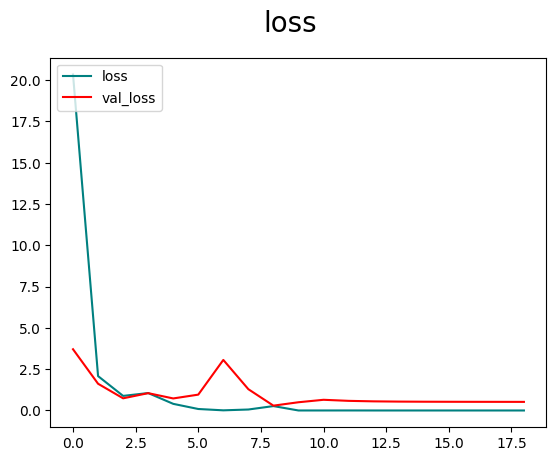

In [28]:
fig=plt.figure()
plt.plot(histL.history['loss'][1:],color='teal',label='loss',)
plt.plot(histL.history['val_loss'][1:],color='red',label='val_loss')
fig.suptitle('loss',fontsize='20')
plt.legend(loc='upper left')
plt.show()

# PLOTTING ACCURACY

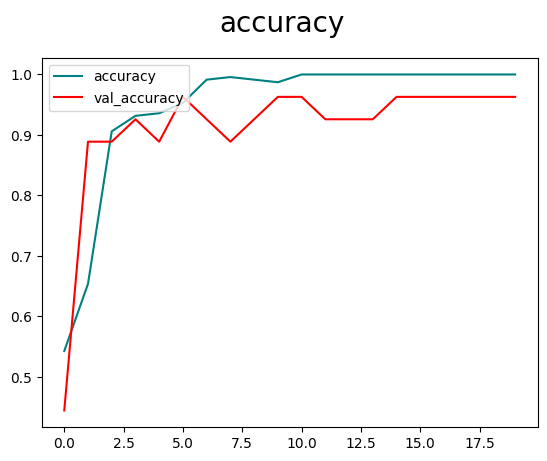

In [29]:
fig=plt.figure()
plt.plot(histL.history['accuracy'],color='teal',label='accuracy')
plt.plot(histL.history['val_accuracy'],color='red',label='val_accuracy')
fig.suptitle('accuracy',fontsize='20')
plt.legend(loc='upper left')
plt.show()

In [30]:
preds = Lenet.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1/1 [==============================] - 1s 615ms/step - loss: 0.9655 - accuracy: 0.9667
Loss = 0.9654935598373413
Test Accuracy = 0.9666666388511658


# VGG16

In [17]:
VGG16 = Sequential()
VGG16.add(Conv2D(input_shape=(256,512,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
VGG16.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
VGG16.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
VGG16.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
VGG16.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
VGG16.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
VGG16.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
VGG16.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
VGG16.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
VGG16.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
VGG16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG16.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
VGG16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG16.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
VGG16.add(layers.Flatten())
VGG16.add(layers.Dense(4096, activation='relu'))
VGG16.add(layers.Dense(4096, activation='relu'))
VGG16.add(layers.Dense(1, activation='sigmoid'))

In [18]:
VGG16.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])
VGG16.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 512, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 512, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 256, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 256, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 256, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 128, 128)     0         
 2D)                                                    

In [19]:
histV = VGG16.fit(X_train,Y_train,epochs=20,validation_data=(X_val,Y_val))

Epoch 1/20
8/8 [==============================] - 67s 4s/step - loss: 1802.6697 - accuracy: 0.4872 - val_loss: 0.6905 - val_accuracy: 0.5556
Epoch 2/20
8/8 [==============================] - 8s 935ms/step - loss: 0.7515 - accuracy: 0.5556 - val_loss: 0.6982 - val_accuracy: 0.4444
Epoch 3/20
8/8 [==============================] - 7s 926ms/step - loss: 0.6947 - accuracy: 0.4872 - val_loss: 0.6951 - val_accuracy: 0.4444
Epoch 4/20
8/8 [==============================] - 8s 952ms/step - loss: 0.6969 - accuracy: 0.5299 - val_loss: 5.1685 - val_accuracy: 0.4444
Epoch 5/20
8/8 [==============================] - 8s 946ms/step - loss: 1.7193 - accuracy: 0.4872 - val_loss: 0.6904 - val_accuracy: 0.5556
Epoch 6/20
8/8 [==============================] - 8s 947ms/step - loss: 0.6989 - accuracy: 0.5043 - val_loss: 0.8666 - val_accuracy: 0.5556
Epoch 7/20
8/8 [==============================] - 8s 942ms/step - loss: 0.7635 - accuracy: 0.4658 - val_loss: 0.6925 - val_accuracy: 0.4815
Epoch 8/20
8/8 [===

# PLOTING LOSS FUNCTION AND VALIDATION LOSS VS EPOCHS

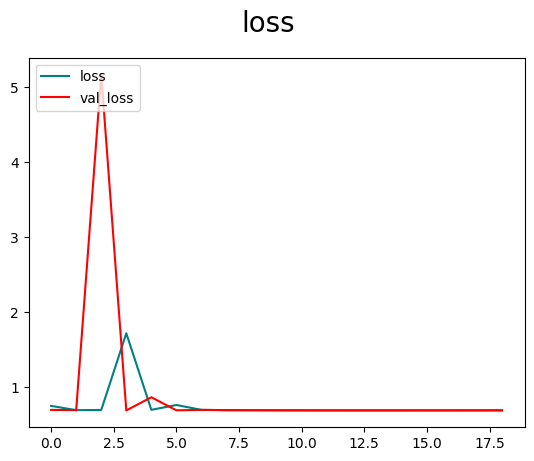

In [20]:
fig=plt.figure()
plt.plot(histV.history['loss'][1:],color='teal',label='loss',)
plt.plot(histV.history['val_loss'][1:],color='red',label='val_loss')
fig.suptitle('loss',fontsize='20')
plt.legend(loc='upper left')
plt.show()

# PLOTTING ACCURACY

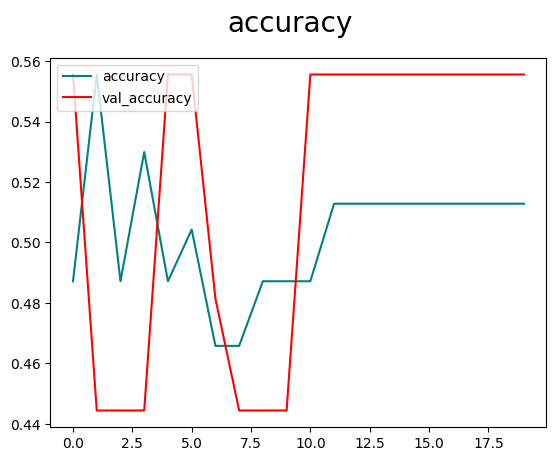

In [21]:
fig=plt.figure()
plt.plot(histV.history['accuracy'],color='teal',label='accuracy')
plt.plot(histV.history['val_accuracy'],color='red',label='val_accuracy')
fig.suptitle('accuracy',fontsize='20')
plt.legend(loc='upper left')
plt.show()

In [22]:
preds = VGG16.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1/1 [==============================] - 10s 10s/step - loss: 0.6898 - accuracy: 0.6333
Loss = 0.6897605061531067
Test Accuracy = 0.6333333253860474


# MobileNet Implementation

In [26]:
import tensorflow as tf
from tensorflow.keras import layers

def conv_block(inputs, filters, kernel_size, strides):
    x = layers.Conv2D(filters, kernel_size, strides=strides, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = tf.nn.relu6(x)
    return x

def bottleneck(inputs, filters, kernel_size, expansion, strides, alpha):
    in_channels = inputs.shape[-1]
    out_channels = filters * alpha

    x = conv_block(inputs, in_channels * expansion, kernel_size=(1, 1), strides=(1, 1))
    x = layers.DepthwiseConv2D(kernel_size, strides=strides, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = tf.nn.relu6(x)

    x = conv_block(x, out_channels, kernel_size=(1, 1), strides=(1, 1))
    return x

def MobileNetV3(input_shape, num_classes, alpha=1.0):
    inputs = layers.Input(shape=input_shape)
    x = conv_block(inputs, 16, kernel_size=(3, 3), strides=(2, 2))

    x = bottleneck(x, 16, kernel_size=(3, 3), expansion=1, strides=1, alpha=alpha)
    x = bottleneck(x, 24, kernel_size=(3, 3), expansion=4, strides=2, alpha=alpha)
    x = bottleneck(x, 24, kernel_size=(3, 3), expansion=3, strides=1, alpha=alpha)
    x = bottleneck(x, 40, kernel_size=(5, 5), expansion=3, strides=2, alpha=alpha)
    x = bottleneck(x, 40, kernel_size=(5, 5), expansion=3, strides=1, alpha=alpha)
    x = bottleneck(x, 40, kernel_size=(5, 5), expansion=3, strides=1, alpha=alpha)
    x = bottleneck(x, 80, kernel_size=(3, 3), expansion=6, strides=2, alpha=alpha)
    x = bottleneck(x, 80, kernel_size=(3, 3), expansion=6, strides=1, alpha=alpha)
    x = bottleneck(x, 80, kernel_size=(3, 3), expansion=6, strides=1, alpha=alpha)
    x = bottleneck(x, 80, kernel_size=(3, 3), expansion=6, strides=1, alpha=alpha)
    x = bottleneck(x, 112, kernel_size=(5, 5), expansion=6, strides=1, alpha=alpha)
    x = bottleneck(x, 112, kernel_size=(5, 5), expansion=6, strides=1, alpha=alpha)
    x = bottleneck(x, 160, kernel_size=(5, 5), expansion=6, strides=2, alpha=alpha)
    x = bottleneck(x, 160, kernel_size=(5, 5), expansion=6, strides=1, alpha=alpha)
    x = bottleneck(x, 160, kernel_size=(5, 5), expansion=6, strides=1, alpha=alpha)
    x = conv_block(x, 960, kernel_size=(1, 1), strides=(1, 1))
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Reshape((1, 1, 960))(x)
    x = layers.Conv2D(num_classes, kernel_size=(1, 1), strides=(1, 1), padding='same')(x)
    x = layers.Flatten()(x)
    x = layers.Activation("sigmoid")(x)

    model = tf.keras.Model(inputs, x)
    return model
input_shape = (256,512, 3)
num_classes = 1
MobileNet = MobileNetV3(input_shape, num_classes, alpha=1.0)

In [27]:
MobileNet.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])
MobileNet.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 512, 3)]     0         
                                                                 
 conv2d_79 (Conv2D)          (None, 128, 256, 16)      448       
                                                                 
 batch_normalization_94 (Bat  (None, 128, 256, 16)     64        
 chNormalization)                                                
                                                                 
 tf.nn.relu6_94 (TFOpLambda)  (None, 128, 256, 16)     0         
                                                                 
 conv2d_80 (Conv2D)          (None, 128, 256, 16)      272       
                                                                 
 batch_normalization_95 (Bat  (None, 128, 256, 16)     64        
 chNormalization)                                          

In [28]:
histM=MobileNet.fit(X_train,Y_train,epochs=20,validation_data=(X_val,Y_val))

Epoch 1/20
8/8 [==============================] - 52s 768ms/step - loss: 0.5533 - accuracy: 0.7436 - val_loss: 0.6990 - val_accuracy: 0.4444
Epoch 2/20
8/8 [==============================] - 2s 243ms/step - loss: 0.3727 - accuracy: 0.8248 - val_loss: 0.7084 - val_accuracy: 0.4444
Epoch 3/20
8/8 [==============================] - 2s 262ms/step - loss: 0.3706 - accuracy: 0.8761 - val_loss: 0.7263 - val_accuracy: 0.4444
Epoch 4/20
8/8 [==============================] - 2s 286ms/step - loss: 0.3628 - accuracy: 0.8675 - val_loss: 0.7430 - val_accuracy: 0.4444
Epoch 5/20
8/8 [==============================] - 2s 253ms/step - loss: 0.3485 - accuracy: 0.8590 - val_loss: 0.7677 - val_accuracy: 0.4444
Epoch 6/20
8/8 [==============================] - 2s 242ms/step - loss: 0.2917 - accuracy: 0.8889 - val_loss: 0.7992 - val_accuracy: 0.4444
Epoch 7/20
8/8 [==============================] - 2s 254ms/step - loss: 0.2215 - accuracy: 0.9231 - val_loss: 0.8174 - val_accuracy: 0.4444
Epoch 8/20
8/8 [===

# PLOTING LOSS FUNCTION AND VALIDATION LOSS VS EPOCHS

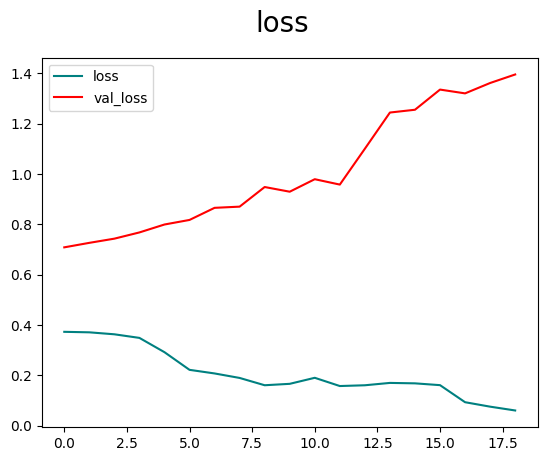

In [29]:
fig=plt.figure()
plt.plot(histM.history['loss'][1:],color='teal',label='loss',)
plt.plot(histM.history['val_loss'][1:],color='red',label='val_loss')
fig.suptitle('loss',fontsize='20')
plt.legend(loc='upper left')
plt.show()

# PLOTTING ACCURACY

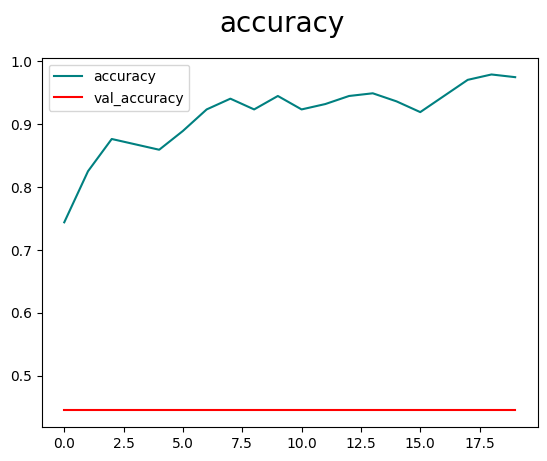

In [31]:
fig=plt.figure()
plt.plot(histM.history['accuracy'],color='teal',label='accuracy')
plt.plot(histM.history['val_accuracy'],color='red',label='val_accuracy')
fig.suptitle('accuracy',fontsize='20')
plt.legend(loc='upper left')
plt.show()

In [32]:
preds = MobileNet.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1/1 [==============================] - 1s 919ms/step - loss: 1.5781 - accuracy: 0.3667
Loss = 1.5780960321426392
Test Accuracy = 0.36666667461395264


# RESNET 50

In [36]:
import tensorflow as tf
from tensorflow.keras import layers

def conv_block(inputs, filters, kernel_size, strides):
    x = layers.Conv2D(filters, kernel_size, strides=strides, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    return x

def identity_block(inputs, filters):
    x = conv_block(inputs, filters, kernel_size=(3, 3), strides=(1, 1))
    x = layers.Conv2D(filters, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Add()([x, inputs])
    x = layers.Activation('relu')(x)
    return x

def conv_block_with_projection(inputs, filters, strides):
    x = conv_block(inputs, filters, kernel_size=(3, 3), strides=strides)
    x = layers.Conv2D(filters, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(inputs)
    shortcut = layers.BatchNormalization()(shortcut)
    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

def ResNet(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    x = conv_block(inputs, 64, kernel_size=(7, 7), strides=(2, 2))
    x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    x = conv_block_with_projection(x, 64, strides=(1, 1))
    x = identity_block(x, 64)
    x = identity_block(x, 64)

    x = conv_block_with_projection(x, 128, strides=(2, 2))
    x = identity_block(x, 128)
    x = identity_block(x, 128)

    x = conv_block_with_projection(x, 256, strides=(2, 2))
    x = identity_block(x, 256)
    x = identity_block(x, 256)

    x = conv_block_with_projection(x, 512, strides=(2, 2))
    x = identity_block(x, 512)
    x = identity_block(x, 512)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='sigmoid')(x)

    model = tf.keras.Model(inputs, x)
    return model

# Example usage
input_shape = (256, 512, 3)
num_classes = 1
ResNet = ResNet(input_shape, num_classes)


In [37]:
ResNet.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])
ResNet.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_141 (Conv2D)            (None, 128, 256, 64  9472        ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_170 (Batch  (None, 128, 256, 64  256        ['conv2d_141[0][0]']             
 Normalization)                 )                                                           

In [38]:
histR=ResNet.fit(X_train,Y_train,epochs=20,validation_data=(X_val,Y_val))

Epoch 1/20
8/8 [==============================] - 35s 1s/step - loss: 2.0859 - accuracy: 0.5641 - val_loss: 64045.3477 - val_accuracy: 0.5556
Epoch 2/20
8/8 [==============================] - 3s 330ms/step - loss: 0.6957 - accuracy: 0.5812 - val_loss: 370163.7500 - val_accuracy: 0.5556
Epoch 3/20
8/8 [==============================] - 3s 353ms/step - loss: 0.5838 - accuracy: 0.7436 - val_loss: 198752.6719 - val_accuracy: 0.5556
Epoch 4/20
8/8 [==============================] - 3s 320ms/step - loss: 0.4780 - accuracy: 0.7991 - val_loss: 25074.0508 - val_accuracy: 0.5556
Epoch 5/20
8/8 [==============================] - 3s 319ms/step - loss: 0.3816 - accuracy: 0.8547 - val_loss: 3998.7043 - val_accuracy: 0.5556
Epoch 6/20
8/8 [==============================] - 2s 311ms/step - loss: 0.2912 - accuracy: 0.8761 - val_loss: 1037.4663 - val_accuracy: 0.5556
Epoch 7/20
8/8 [==============================] - 3s 319ms/step - loss: 0.1533 - accuracy: 0.9487 - val_loss: 231.8843 - val_accuracy: 0.5

# PLOTING LOSS FUNCTION AND VALIDATION LOSS VS EPOCHS

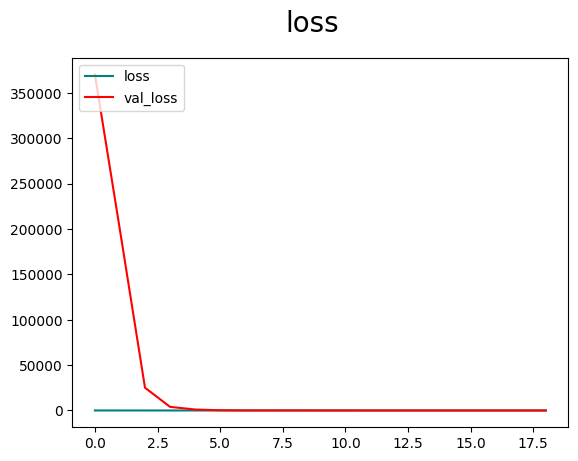

In [39]:
fig=plt.figure()
plt.plot(histR.history['loss'][1:],color='teal',label='loss',)
plt.plot(histR.history['val_loss'][1:],color='red',label='val_loss')
fig.suptitle('loss',fontsize='20')
plt.legend(loc='upper left')
plt.show()

# PLOTTING ACCURACY

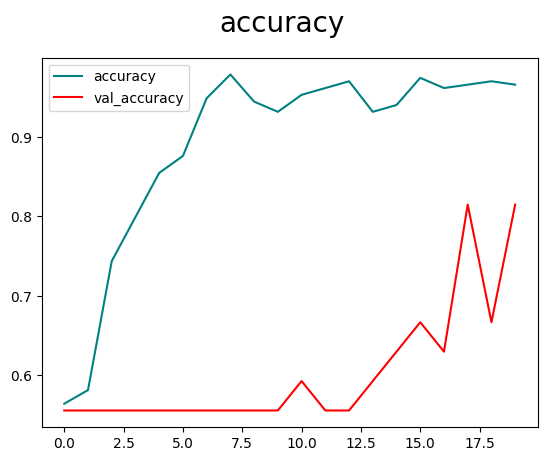

In [40]:
fig=plt.figure()
plt.plot(histR.history['accuracy'],color='teal',label='accuracy')
plt.plot(histR.history['val_accuracy'],color='red',label='val_accuracy')
fig.suptitle('accuracy',fontsize='20')
plt.legend(loc='upper left')
plt.show()

In [41]:
preds = ResNet.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1/1 [==============================] - 2s 2s/step - loss: 1.3794 - accuracy: 0.8667
Loss = 1.3794244527816772
Test Accuracy = 0.8666666746139526


**Accuracy of each model are as following, Out of all models Lenet-5 performed best**

**1. LeNet-5 = 96.6%**

**2. ResNet50 = 86.6%**

**3. AlexNet = 73.3%**

**4. VGG16   = 63.3%**

**5. MobileNet = 36.6%**